In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("pitch_movement_SL.csv")

print(df.shape)
print(df.keys())
df.head()

(364, 24)
Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')


,year,last_name,first_name,pitcher_id,team_name,team_name_abbrev,pitch_hand,avg_speed,pitches_thrown,total_pitches,...,pitcher_break_z,league_break_z,diff_z,rise,pitcher_break_x,league_break_x,diff_x,tail,percent_rank_diff_z,percent_rank_diff_x
0,2022,Cease,Dylan,656302,White Sox,CWS,R,87.4,1338,3120,...,35.0,-33.3,1.7,5,4.0,4.2,-0.2,-6,0.716253,0.498623
1,2022,Ray,Robbie,592662,Mariners,SEA,L,87.2,1133,3047,...,28.3,-33.5,-5.2,-16,1.5,4.5,-3.0,-67,0.027548,0.201102
2,2022,Webb,Logan,657277,Giants,SF,R,82.5,982,3006,...,39.4,-37.9,1.6,4,10.2,10.3,-0.1,-1,0.705234,0.517906
3,2022,Rodón,Carlos,607074,Giants,SF,L,85.4,916,2985,...,38.6,-35.6,3.0,8,8.1,5.1,3.0,58,0.837466,0.804408
4,2022,Junis,Jakob,596001,Giants,SF,R,83.1,909,1802,...,38.9,-38.9,0.0,0,13.3,7.5,5.8,77,0.482094,0.936639


In [10]:
del df['year']
del df['team_name']
del df['pitches_per_game']
del df['pitch_per']
del df['league_break_z']
del df['diff_z']
del df['rise']
del df['league_break_x']
del df['diff_x']
del df['tail']
del df['percent_rank_diff_z']
del df['percent_rank_diff_x']

In [11]:
df.head()
print(df.keys())

Index(['last_name', ' first_name', 'pitcher_id', 'team_name_abbrev',
       'pitch_hand', 'avg_speed', 'pitches_thrown', 'total_pitches',
       'pitch_type', 'pitch_type_name', 'pitcher_break_z', 'pitcher_break_x'],
      dtype='object')


In [12]:
df["name"] = df[" first_name"].str.cat(df["last_name"], sep=" ")

In [13]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('name')))
df = df.reindex(columns= cols)

In [14]:
df.rename(columns={'pitcher_break_z':'vertical_break','pitcher_break_x':'horizonal_break','team_name_abbrev':'team_name'},inplace=True)

In [15]:
df.to_csv('slider_data.csv', index=False)

# EDA

In [16]:
df.describe()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,619608.563187,84.515110,347.596154,1321.714286,36.697527,6.842582
std,57267.002971,3.119779,210.991583,710.052061,4.929818,4.588526
min,425844.000000,69.200000,37.000000,487.000000,25.500000,0.100000
25%,594579.250000,82.475000,189.750000,815.750000,33.100000,3.500000
50%,641720.500000,84.850000,310.000000,1031.500000,36.650000,5.600000
75%,664170.500000,86.725000,466.750000,1789.250000,39.900000,9.850000
max,693821.000000,92.600000,1338.000000,3274.000000,56.500000,22.700000


In [17]:
348/1322

#In 2022, MLB pitchers threw 26% slider in average

0.2632375189107413

In [18]:
df.corr()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
pitcher_id,1.000000,0.086577,-0.016195,-0.078293,-0.045268,-0.050835
avg_speed,0.086577,1.000000,0.122403,0.080368,-0.755463,-0.601837
pitches_thrown,-0.016195,0.122403,1.000000,0.661011,-0.109444,-0.042957
total_pitches,-0.078293,0.080368,0.661011,1.000000,-0.080278,-0.083420
vertical_break,-0.045268,-0.755463,-0.109444,-0.080278,1.000000,0.525348
horizonal_break,-0.050835,-0.601837,-0.042957,-0.083420,0.525348,1.000000


<AxesSubplot:>

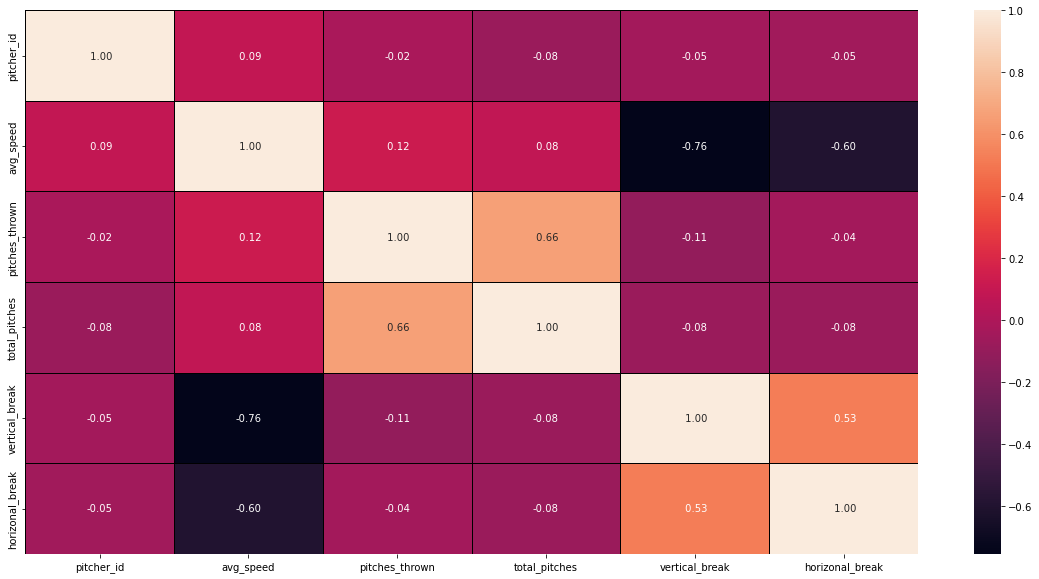

In [19]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

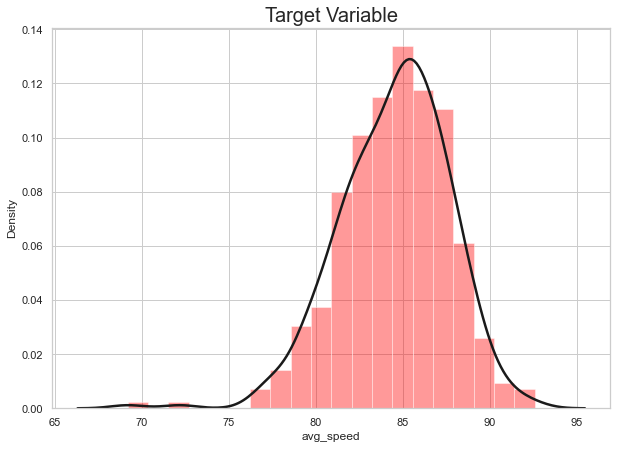

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['avg_speed'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

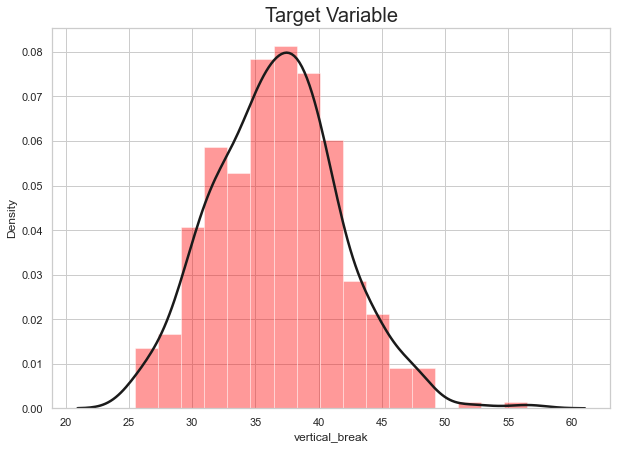

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['vertical_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

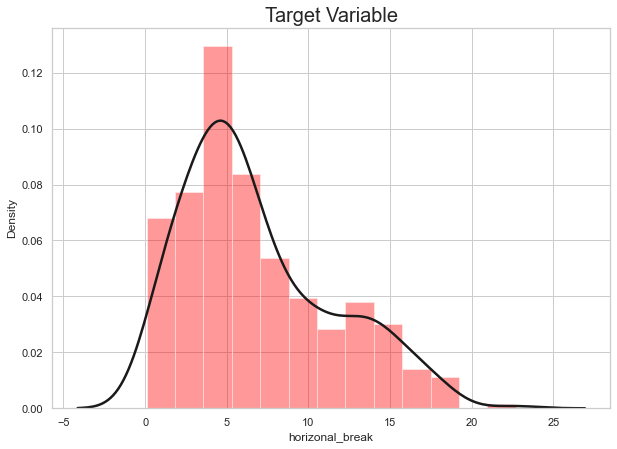

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['horizonal_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

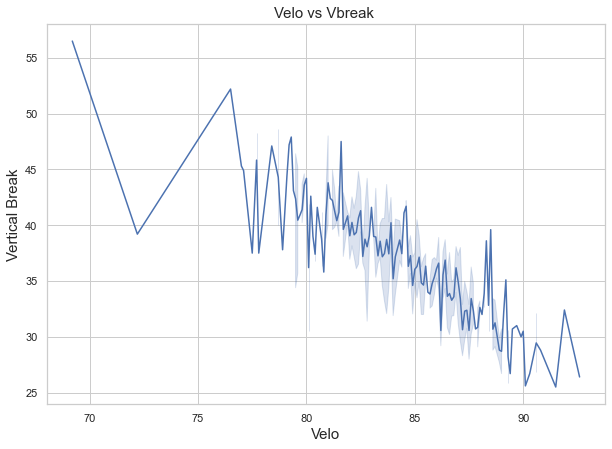

In [23]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='avg_speed', y='vertical_break')
plt.title('Velo vs Vbreak ', fontsize=15)
plt.xlabel('Velo', fontsize=15)
plt.ylabel('Vertical Break',fontsize=15)
plt.show()

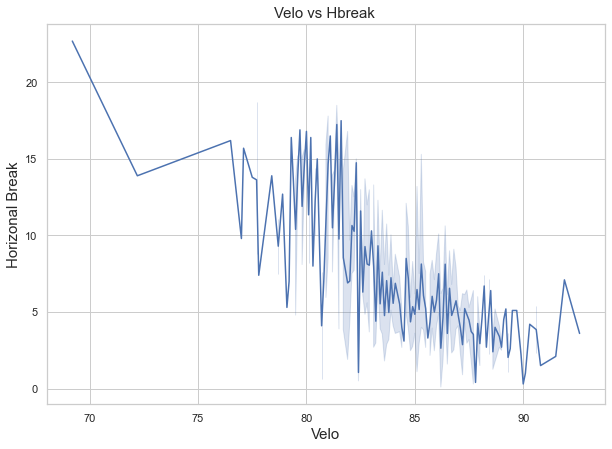

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='avg_speed', y='horizonal_break')
plt.title('Velo vs Hbreak ', fontsize=15)
plt.xlabel('Velo', fontsize=15)
plt.ylabel('Horizonal Break',fontsize=15)
plt.show()

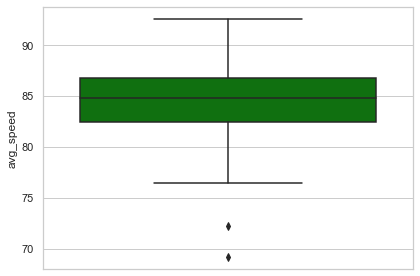

In [25]:
sns.boxplot(y=df['avg_speed'], color='green', orient='x')
plt.tight_layout()

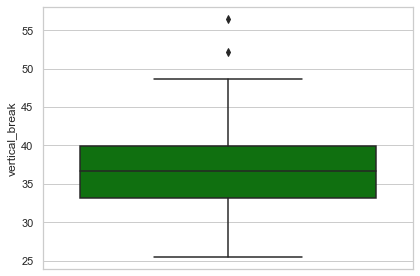

In [26]:
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()

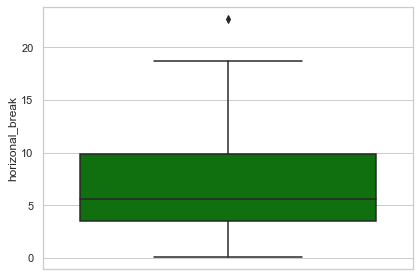

In [27]:
sns.boxplot(y=df['horizonal_break'], color='green', orient='x')
plt.tight_layout()

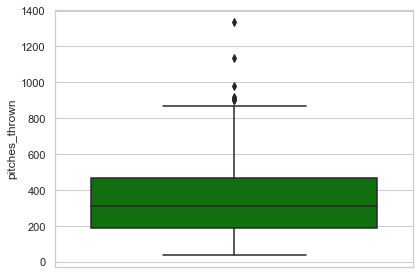

In [28]:
sns.boxplot(y=df['pitches_thrown'], color='green', orient='x')
plt.tight_layout()

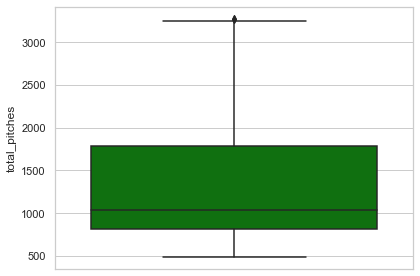

In [29]:
sns.boxplot(y=df['total_pitches'], color='green', orient='x')
plt.tight_layout()